# Vegetable Price Prediction Using Machine Learning
Implemented for Ahmedabad, Sanad market (Commodity = Paddy(Dhan)(Common)) 

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [24]:
vegetables = pd.read_csv('Ahmedabad_paddy.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Ahmedabad,Dholka,Paddy(Dhan)(Common),Other,FAQ,1400,1760,1750,21-Oct-19
1,2,Ahmedabad,Dholka(Koth),Paddy(Dhan)(Common),Other,FAQ,1550,1755,1750,25-Jun-19
2,3,Ahmedabad,Dholka(Koth),Paddy(Dhan)(Common),Other,FAQ,1550,1760,1750,22-Jun-19
3,4,Ahmedabad,Dholka(Koth),Paddy(Dhan)(Common),Other,FAQ,1300,1755,1750,19-Jun-19
4,5,Ahmedabad,Dholka(Koth),Paddy(Dhan)(Common),Other,FAQ,1300,1770,1750,17-Jun-19


# Data Selection

select District Name == Ahmedabad <br>
Select Market Name == Sanad <br>
Then Select Commodity == Paddy(Dhan)(Common)

In [25]:
vegetables = vegetables[vegetables['District Name'] == "Ahmedabad"]
vegetables = vegetables[vegetables['Market Name'] == "Sanad"]
vegetables = vegetables[vegetables['Commodity'] == "Paddy(Dhan)(Common)"]

vegetables = vegetables.drop(['Sl no.','Commodity','Grade'], axis = 1)
vegetables.head()

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
77,Ahmedabad,Sanad,Other,2050,2050,2050,30-Dec-19
78,Ahmedabad,Sanad,Other,1758,1758,1758,28-Dec-19
79,Ahmedabad,Sanad,Other,3152,3152,3152,27-Dec-19
80,Ahmedabad,Sanad,Paddy,3775,3775,3775,26-Dec-19
81,Ahmedabad,Sanad,Other,3402,3402,3402,23-Dec-19


In [26]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,District Name,Market Name,Variety,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
86,Ahmedabad,Sanad,Other,1280,5000,3890,12
85,Ahmedabad,Sanad,Other,1300,4630,4465,14
84,Ahmedabad,Sanad,Other,2957,2957,2957,18
83,Ahmedabad,Sanad,Other,2665,2665,2665,19
82,Ahmedabad,Sanad,Other,2000,2000,2000,21
81,Ahmedabad,Sanad,Other,3402,3402,3402,23
80,Ahmedabad,Sanad,Paddy,3775,3775,3775,26
79,Ahmedabad,Sanad,Other,3152,3152,3152,27
78,Ahmedabad,Sanad,Other,1758,1758,1758,28
77,Ahmedabad,Sanad,Other,2050,2050,2050,30


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [27]:
climate = pd.read_csv('climate_Ahemdabad_Paddy_120.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index District Name Market Name Variety  Min Price (Rs./Quintal)  \
0    214     Ahmedabad       Sanad   Other                     1300   
1    213     Ahmedabad       Sanad   Other                     1390   
2    212     Ahmedabad       Sanad   Other                     1305   
3    211     Ahmedabad       Sanad   Other                     1300   
4    210     Ahmedabad       Sanad   Other                     1400   

   Max Price (Rs./Quintal)  Modal Price (Rs./Quintal)  Price Date   Temp_Max  \
0                     1905                       1752           1  92.775000   
1                     1875                       1762           2  92.725000   
2                     2105                       1755           3  92.666667   
3                     1910                       1805           4  92.616667   
4                     1775                       1751           5  92.583333   

    Temp_Avg  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  Humid_Min  \
0  78.944167  ..

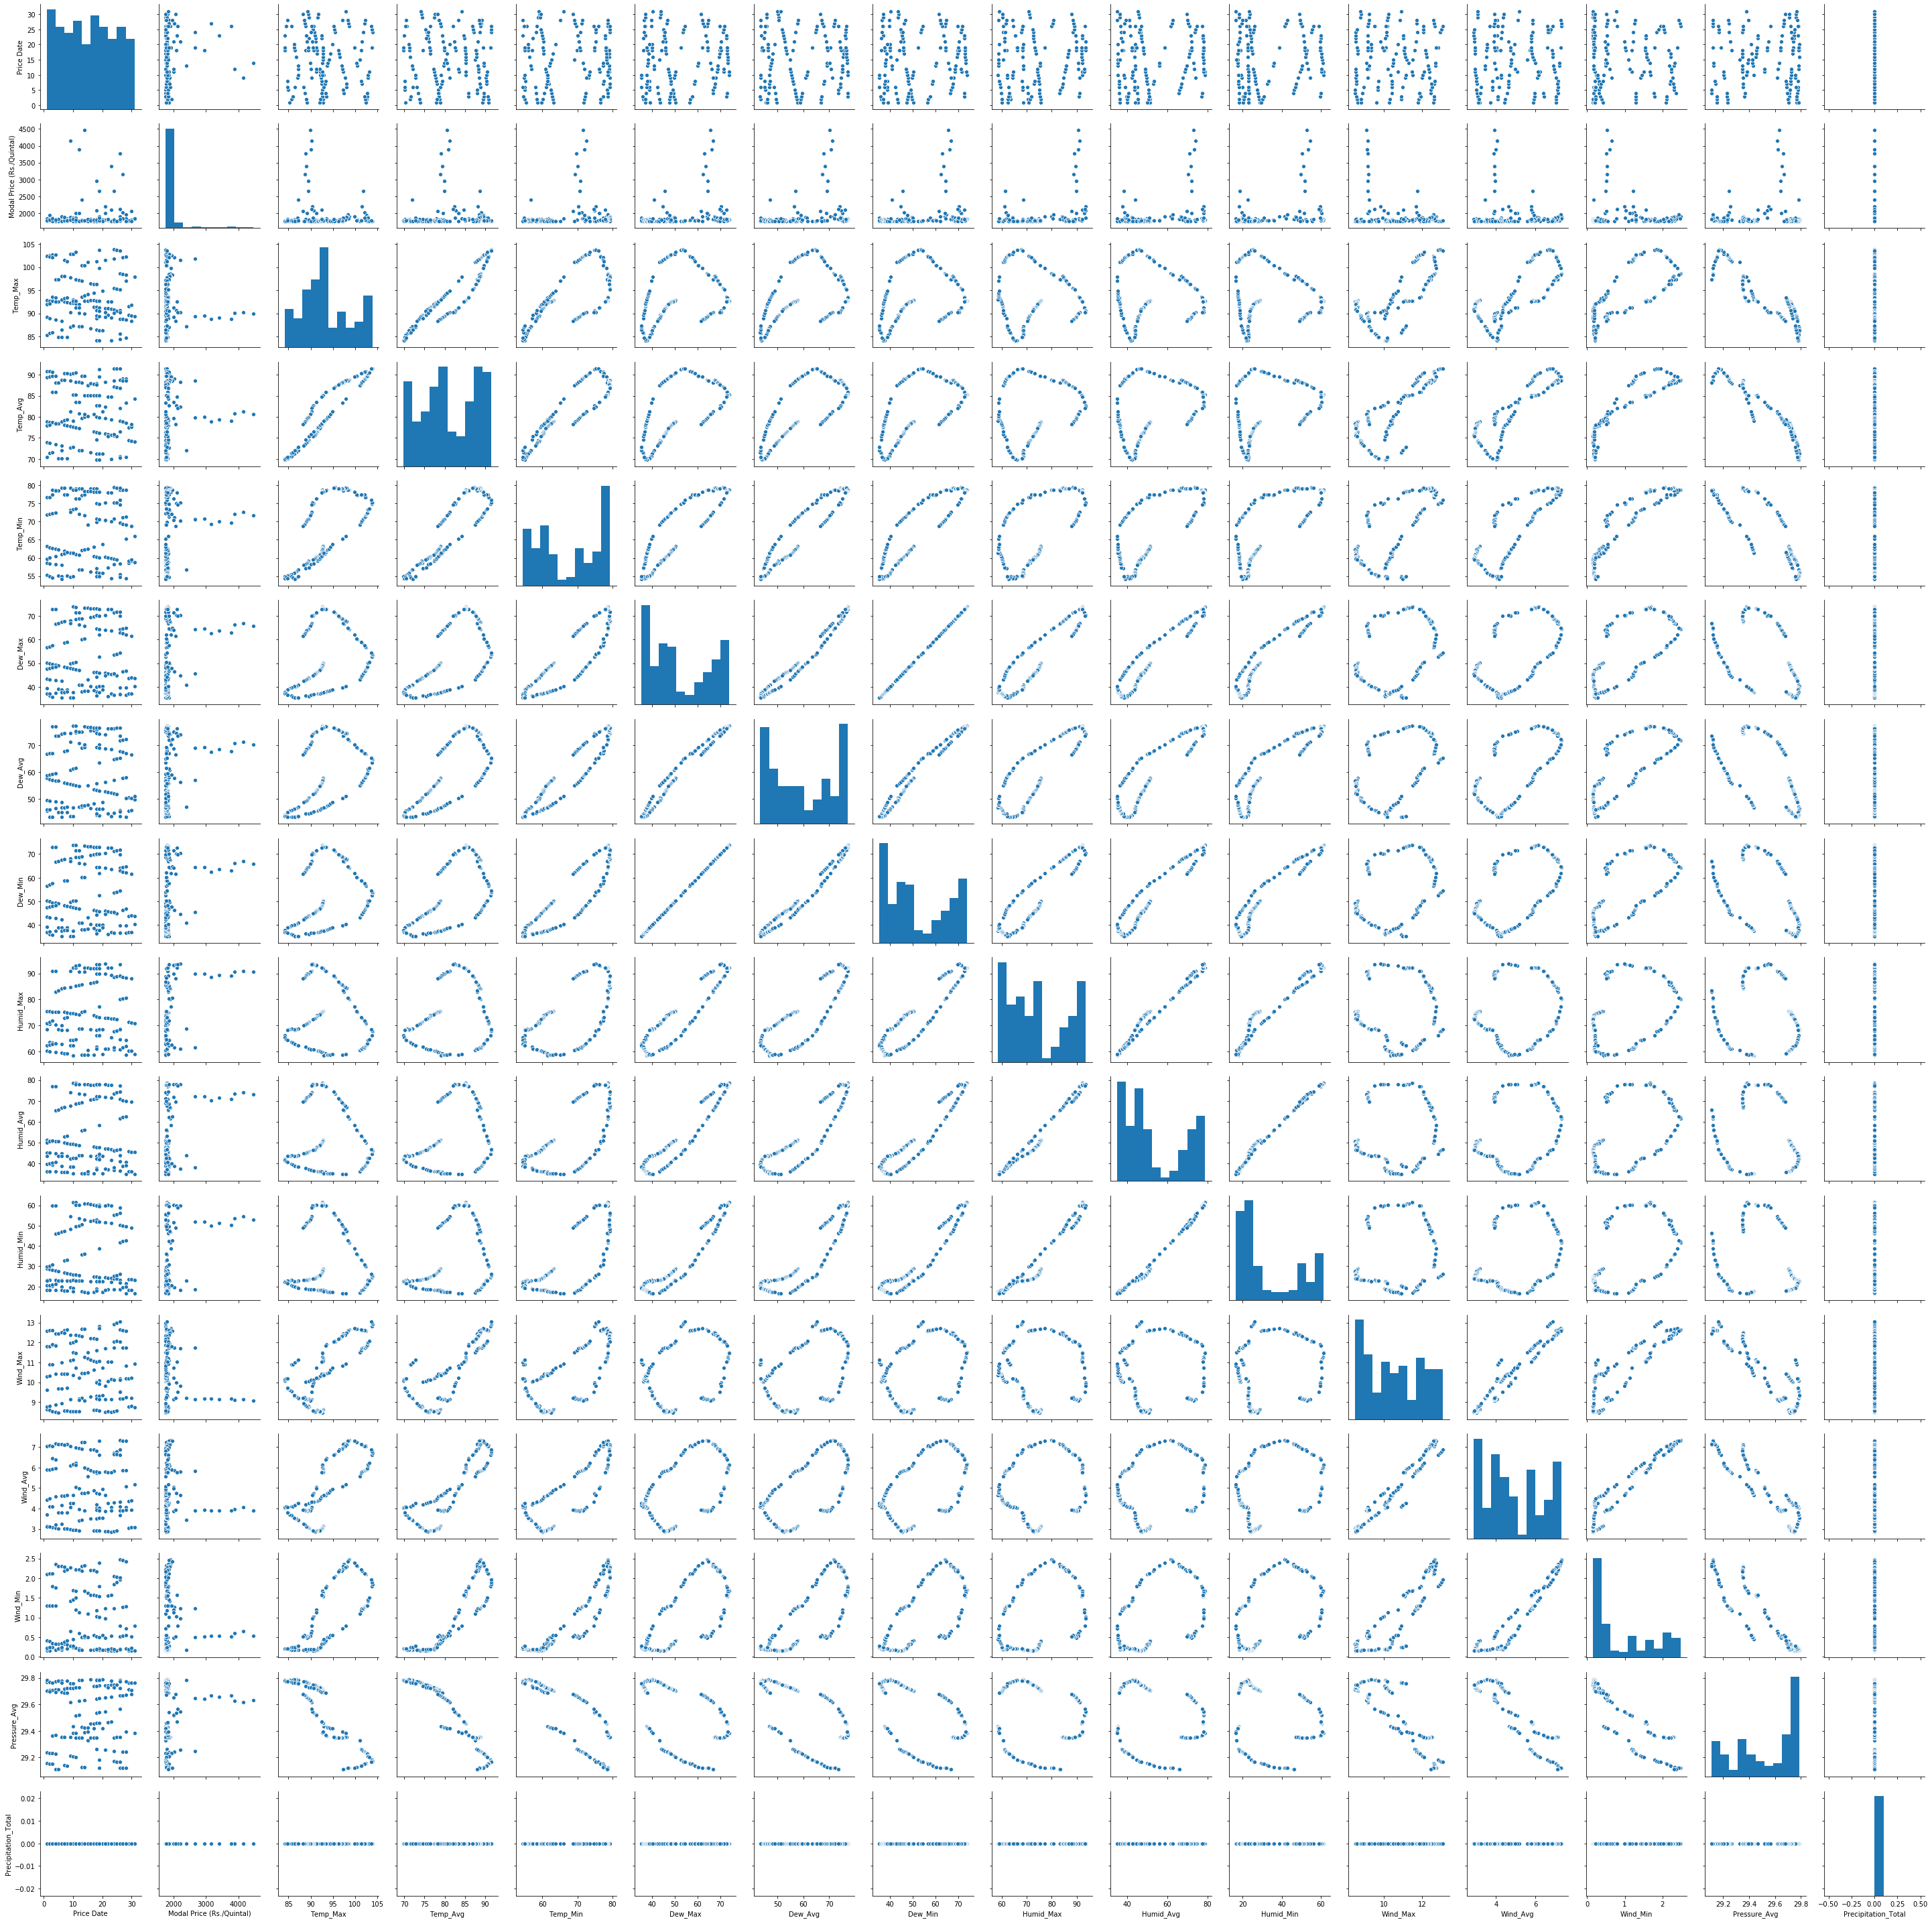

In [8]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [30]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 140,max_depth=300, random_state=42, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.594444990158081


In [31]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [32]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.957037554161794
0.44078638913665347


# Feature Importance

In [33]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.04738239716158871
Temp_Max -> 0.13574956351441245
Temp_Avg -> 0.05577573048654319
Temp_Min -> 0.08325825548944807
Dew_Max -> 0.03715947901234422
Dew_Avg -> 0.03841207386108993
Dew_Min -> 0.0455778539510727
Humid_Max -> 0.07531135778312927
Humid_Avg -> 0.03613182982357769
Humid_Min -> 0.045076813521188634
Wind_Max -> 0.160563380025944
Wind_Avg -> 0.06942625469990413
Wind_Min -> 0.09557868589840109
Pressure_Avg -> 0.07459632477135598
Precipitation_Total -> 0.0


# predicted vs Actual

In [34]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

1826.6->1755
1827.6285714285714->1806
1796.7857142857142->1753
1774.85->1753
1953.95->2075
1797.05->1835
1773.1285714285714->1753
1797.4285714285713->1775
3388.3785714285714->3402
1826.3285714285714->1805
1829.5928571428572->1775
1775.4642857142858->1850
2050.4214285714284->2200
1841.85->1750
1779.8214285714287->1792
1772.2->1771
1777.7857142857142->2397
1808.5->1753
3315.0714285714284->2000
1782.6214285714286->1760
2000.7714285714285->2205
1797.8714285714286->1751
1805.5214285714285->1835
1782.65->1763
1825.3428571428572->1790
1791.5714285714287->1860
1796.107142857143->1760
1802.6857142857143->1753
1783.442857142857->1773
3395.6->2957
1778.0357142857142->1785
1794.3857142857144->1753
1794.8357142857142->1820
1794.0785714285714->1800
1837.9642857142858->1875
1809.807142857143->1805
1791.1357142857144->1751
1805.5357142857142->1752
1818.7857142857142->1850
1764.0785714285714->1770
1765.6285714285714->1755
1772.25->1751


In [35]:
print(sum_a/l)
print(np.square(np.subtract(np.reshape(predicted,(len(y_test),1)),np.reshape(y_test.values,(len(y_test),1)))).mean())
#print(np.reshape(predicted,(len(y_test),1)))
#print(np.reshape(y_test.values,(len(y_test),1)))

95.58367346938779
58066.13168853254


# Create picke file

In [36]:
import pickle
filename = 'Ahemdabad_Paddy'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [37]:
filename = 'Ahemdabad_Paddy'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [38]:
print(sum/len(actual)) 

61.27479296066254
